1. Replace Null
2. Change date format
3. Text processing
    - lowercase
    - expand contractions
    - remove accented characters
    - remove special characters, punctuation, numbers, whitespaces
    - remove stopwords, tokenization (NLP)
    - lemmatization with POS Tag
4. sentiment with VADER
5. EDA 
    - sentiment distribution
    - sentiment across months
    - Words Frequency
6. Feature extraction: TF-IDF
    - Using GridSearch to find optimal features for each model
7. Stratified K-fold cross validation 
8. Imbalanced data
    - SMOTE 
    - Random OverSampling
    - Random UnderSampling
9. ML algorithms
    - NB
    - RF
    - SVC
    - AdaBoost
    

In [1]:
import os
import pandas as pd
import numpy as np
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
nltk.download('words')
words = set(nltk.corpus.words.words())
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk import ne_chunk

import re
import demoji
import pycld2 as cld2
import matplotlib.pyplot as plt
import string

from dateutil.parser import parse
import seaborn as sns



[nltk_data] Downloading package words to /Users/ifothman/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
os.getcwd()


'/Users/ifothman'

In [3]:
os.chdir("/Users/ifothman/Python data/DS Project")


In [4]:
df = pd.read_csv("/Users/ifothman/Python data/DS Project/data3.csv")


In [5]:
#check on the attributes
df.shape


(11582, 5)

In [6]:
#check for any null values in every attributes
df.isnull().sum()/df.shape[0] * 100


author_id           0.000000
username            0.000000
author_location    18.684165
text                0.000000
created_at          0.000000
dtype: float64

## Replace NULL

In [7]:
#replace null value with empty spaces
df.fillna(' ', inplace=True)
df.head()

,author_id,username,author_location,text,created_at
0,3345194367,Corix_JC,"London, England",The Future of Work and the Great Realignment \...,2022-10-30 22:05:01+00:00
1,1309334978795372544,_Jose_Rico,Dusseldorf,Learn more about the importance of agency coll...,2022-10-30 20:00:36+00:00
2,614598187,swetaregmi,Canada,#returntowork ?\n are #scentpolicy in place? \...,2022-10-30 19:00:16+00:00
3,130533518,chpar22,,RT @mtptproject: #KITdays for coaching! \n\nCo...,2022-10-30 16:50:47+00:00
4,736472070,corixpartners,"London, UK",RT @Corix_JC: #Hybrid Work Is Not the Problem ...,2022-10-30 15:51:26+00:00


## Change date format

In [8]:
#make a copy
df2 = df.copy()

#check on the data type of each columns
df2.dtypes

author_id           int64
username           object
author_location    object
text               object
created_at         object
dtype: object

In [9]:
#convert object to datetime format
df2['created_at'] = pd.to_datetime(df2.created_at, format='%Y-%m-%d %H:%M:%S+00:00')

#change to days/months/year format
df2['date'] = df2['created_at'].dt.strftime('%d/%m/%Y')


In [10]:
df2

,author_id,username,author_location,text,created_at,date
0,3345194367,Corix_JC,"London, England",The Future of Work and the Great Realignment \...,2022-10-30 22:05:01,30/10/2022
1,1309334978795372544,_Jose_Rico,Dusseldorf,Learn more about the importance of agency coll...,2022-10-30 20:00:36,30/10/2022
2,614598187,swetaregmi,Canada,#returntowork ?\n are #scentpolicy in place? \...,2022-10-30 19:00:16,30/10/2022
3,130533518,chpar22,,RT @mtptproject: #KITdays for coaching! \n\nCo...,2022-10-30 16:50:47,30/10/2022
4,736472070,corixpartners,"London, UK",RT @Corix_JC: #Hybrid Work Is Not the Problem ...,2022-10-30 15:51:26,30/10/2022
...,...,...,...,...,...,...
11577,1942523551,FlexisourceIT,"Victoria, Australia",Is your company one of those organizations ret...,2022-04-01 01:00:01,01/04/2022
11578,295475781,KatieRitchie131,"Baltimore, MD",Search results for “work pants that feel like ...,2022-04-01 00:58:42,01/04/2022
11579,18665100,brianpelliott,"San Francisco, CA",@FutureForum Myth 2 driving #ReturnToOffice: t...,2022-04-01 00:38:34,01/04/2022
11580,1306136273782935553,MentalHealthBo5,,RT @mindnation: Feeling #stressed and #anxious...,2022-04-01 00:05:09,01/04/2022


In [11]:
#add on the months
df2['months'] = df2['created_at'].dt.strftime('%m')

In [12]:
df2

,author_id,username,author_location,text,created_at,date,months
0,3345194367,Corix_JC,"London, England",The Future of Work and the Great Realignment \...,2022-10-30 22:05:01,30/10/2022,10
1,1309334978795372544,_Jose_Rico,Dusseldorf,Learn more about the importance of agency coll...,2022-10-30 20:00:36,30/10/2022,10
2,614598187,swetaregmi,Canada,#returntowork ?\n are #scentpolicy in place? \...,2022-10-30 19:00:16,30/10/2022,10
3,130533518,chpar22,,RT @mtptproject: #KITdays for coaching! \n\nCo...,2022-10-30 16:50:47,30/10/2022,10
4,736472070,corixpartners,"London, UK",RT @Corix_JC: #Hybrid Work Is Not the Problem ...,2022-10-30 15:51:26,30/10/2022,10
...,...,...,...,...,...,...,...
11577,1942523551,FlexisourceIT,"Victoria, Australia",Is your company one of those organizations ret...,2022-04-01 01:00:01,01/04/2022,04
11578,295475781,KatieRitchie131,"Baltimore, MD",Search results for “work pants that feel like ...,2022-04-01 00:58:42,01/04/2022,04
11579,18665100,brianpelliott,"San Francisco, CA",@FutureForum Myth 2 driving #ReturnToOffice: t...,2022-04-01 00:38:34,01/04/2022,04
11580,1306136273782935553,MentalHealthBo5,,RT @mindnation: Feeling #stressed and #anxious...,2022-04-01 00:05:09,01/04/2022,04


## Remove Columns 

In [13]:
#create a copy
df3 = df2.copy()

In [14]:
#drop irrelevant columns
df3 = df3.drop(['author_id','username','created_at'], axis=1)

In [15]:
df3

,author_location,text,date,months
0,"London, England",The Future of Work and the Great Realignment \...,30/10/2022,10
1,Dusseldorf,Learn more about the importance of agency coll...,30/10/2022,10
2,Canada,#returntowork ?\n are #scentpolicy in place? \...,30/10/2022,10
3,,RT @mtptproject: #KITdays for coaching! \n\nCo...,30/10/2022,10
4,"London, UK",RT @Corix_JC: #Hybrid Work Is Not the Problem ...,30/10/2022,10
...,...,...,...,...
11577,"Victoria, Australia",Is your company one of those organizations ret...,01/04/2022,04
11578,"Baltimore, MD",Search results for “work pants that feel like ...,01/04/2022,04
11579,"San Francisco, CA",@FutureForum Myth 2 driving #ReturnToOffice: t...,01/04/2022,04
11580,,RT @mindnation: Feeling #stressed and #anxious...,01/04/2022,04


## Text-processing

Remove @ sign, links, special characters, hashtag

1. Lowercase
2. Expand contractions
3. Remove accented characters
4. Remove special characters, numbers, punctuations, whitespaces
5. Remove stopwords & tokenization
6. Lemmatization with POS Tag



### Lowercase

In [16]:
df3['clean_text'] = df3['text'].astype(str).str.lower()

In [17]:
df3

,author_location,text,date,months,clean_text
0,"London, England",The Future of Work and the Great Realignment \...,30/10/2022,10,the future of work and the great realignment \...
1,Dusseldorf,Learn more about the importance of agency coll...,30/10/2022,10,learn more about the importance of agency coll...
2,Canada,#returntowork ?\n are #scentpolicy in place? \...,30/10/2022,10,#returntowork ?\n are #scentpolicy in place? \...
3,,RT @mtptproject: #KITdays for coaching! \n\nCo...,30/10/2022,10,rt @mtptproject: #kitdays for coaching! \n\nco...
4,"London, UK",RT @Corix_JC: #Hybrid Work Is Not the Problem ...,30/10/2022,10,rt @corix_jc: #hybrid work is not the problem ...
...,...,...,...,...,...
11577,"Victoria, Australia",Is your company one of those organizations ret...,01/04/2022,04,is your company one of those organizations ret...
11578,"Baltimore, MD",Search results for “work pants that feel like ...,01/04/2022,04,search results for “work pants that feel like ...
11579,"San Francisco, CA",@FutureForum Myth 2 driving #ReturnToOffice: t...,01/04/2022,04,@futureforum myth 2 driving #returntooffice: t...
11580,,RT @mindnation: Feeling #stressed and #anxious...,01/04/2022,04,rt @mindnation: feeling #stressed and #anxious...


### Expand contractions

In [18]:
def expand(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

df3['clean_text'] = df3['clean_text'].apply(expand)

In [19]:
df3

,author_location,text,date,months,clean_text
0,"London, England",The Future of Work and the Great Realignment \...,30/10/2022,10,the future of work and the great realignment \...
1,Dusseldorf,Learn more about the importance of agency coll...,30/10/2022,10,learn more about the importance of agency coll...
2,Canada,#returntowork ?\n are #scentpolicy in place? \...,30/10/2022,10,#returntowork ?\n are #scentpolicy in place? \...
3,,RT @mtptproject: #KITdays for coaching! \n\nCo...,30/10/2022,10,rt @mtptproject: #kitdays for coaching! \n\nco...
4,"London, UK",RT @Corix_JC: #Hybrid Work Is Not the Problem ...,30/10/2022,10,rt @corix_jc: #hybrid work is not the problem ...
...,...,...,...,...,...
11577,"Victoria, Australia",Is your company one of those organizations ret...,01/04/2022,04,is your company one of those organizations ret...
11578,"Baltimore, MD",Search results for “work pants that feel like ...,01/04/2022,04,search results for “work pants that feel like ...
11579,"San Francisco, CA",@FutureForum Myth 2 driving #ReturnToOffice: t...,01/04/2022,04,@futureforum myth 2 driving #returntooffice: t...
11580,,RT @mindnation: Feeling #stressed and #anxious...,01/04/2022,04,rt @mindnation: feeling #stressed and #anxious...


### Remove accented characters

In [20]:
def clean(text):
    text = " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split()) #remove @, #, and links             
    text = " ".join(w for w in nltk.wordpunct_tokenize(text) #tokenization
         if w.lower() in words or not w.isalpha()) 
    return text
    

df3['clean_text'] = df3['clean_text'].apply(clean)


In [21]:
df3


,author_location,text,date,months,clean_text
0,"London, England",The Future of Work and the Great Realignment \...,30/10/2022,10,the future of work and the great realignment b...
1,Dusseldorf,Learn more about the importance of agency coll...,30/10/2022,10,learn more about the importance of agency coll...
2,Canada,#returntowork ?\n are #scentpolicy in place? \...,30/10/2022,10,are in place my
3,,RT @mtptproject: #KITdays for coaching! \n\nCo...,30/10/2022,10,for coaching covering the of 1 1 and group coa...
4,"London, UK",RT @Corix_JC: #Hybrid Work Is Not the Problem ...,30/10/2022,10,hybrid work is not the problem but remote who ...
...,...,...,...,...,...
11577,"Victoria, Australia",Is your company one of those organizations ret...,01/04/2022,04,is your company one of those to the office che...
11578,"Baltimore, MD",Search results for “work pants that feel like ...,01/04/2022,04,search for work pants that feel like and is it...
11579,"San Francisco, CA",@FutureForum Myth 2 driving #ReturnToOffice: t...,01/04/2022,04,myth 2 driving the idea that and chance build ...
11580,,RT @mindnation: Feeling #stressed and #anxious...,01/04/2022,04,feeling and anxious about to work here are som...


## Remove special characters, punctuation, numbers, whitespaces

In [22]:
def clean_2(text):
    text = re.sub(r'[^a-zA-z0-9\s]', '', text) #remove special characters
    text = re.sub('[%s]'% re.escape(string.punctuation),'', text) #remove punctuation
    text = re.sub(r'\d+', '', text) #remove numbers
    text.split() #remove whitespaces
    return text


In [23]:
df3['clean_text'] = df3['clean_text'].apply(clean_2)

In [24]:
df3

,author_location,text,date,months,clean_text
0,"London, England",The Future of Work and the Great Realignment \...,30/10/2022,10,the future of work and the great realignment b...
1,Dusseldorf,Learn more about the importance of agency coll...,30/10/2022,10,learn more about the importance of agency coll...
2,Canada,#returntowork ?\n are #scentpolicy in place? \...,30/10/2022,10,are in place my
3,,RT @mtptproject: #KITdays for coaching! \n\nCo...,30/10/2022,10,for coaching covering the of and group coach...
4,"London, UK",RT @Corix_JC: #Hybrid Work Is Not the Problem ...,30/10/2022,10,hybrid work is not the problem but remote who ...
...,...,...,...,...,...
11577,"Victoria, Australia",Is your company one of those organizations ret...,01/04/2022,04,is your company one of those to the office che...
11578,"Baltimore, MD",Search results for “work pants that feel like ...,01/04/2022,04,search for work pants that feel like and is it...
11579,"San Francisco, CA",@FutureForum Myth 2 driving #ReturnToOffice: t...,01/04/2022,04,myth driving the idea that and chance build a...
11580,,RT @mindnation: Feeling #stressed and #anxious...,01/04/2022,04,feeling and anxious about to work here are som...


## Remove stopwords & Tokenization

In [25]:
def stopwrds(text):
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    remove_stopwords = [word for word in word_tokens if word not in stop_words]
    return remove_stopwords

In [26]:
df3['clean_text'] = df3['clean_text'].apply(stopwrds)

In [27]:
df3

,author_location,text,date,months,clean_text
0,"London, England",The Future of Work and the Great Realignment \...,30/10/2022,10,"[future, work, great, realignment, business, l..."
1,Dusseldorf,Learn more about the importance of agency coll...,30/10/2022,10,"[learn, importance, agency, collaboration, hyb..."
2,Canada,#returntowork ?\n are #scentpolicy in place? \...,30/10/2022,10,[place]
3,,RT @mtptproject: #KITdays for coaching! \n\nCo...,30/10/2022,10,"[coaching, covering, group, coaching, coul]"
4,"London, UK",RT @Corix_JC: #Hybrid Work Is Not the Problem ...,30/10/2022,10,"[hybrid, work, problem, remote, trust]"
...,...,...,...,...,...
11577,"Victoria, Australia",Is your company one of those organizations ret...,01/04/2022,04,"[company, one, office, check, article, governm..."
11578,"Baltimore, MD",Search results for “work pants that feel like ...,01/04/2022,04,"[search, work, pants, feel, like, acceptable, ..."
11579,"San Francisco, CA",@FutureForum Myth 2 driving #ReturnToOffice: t...,01/04/2022,04,"[myth, driving, idea, chance, build, drive, in..."
11580,,RT @mindnation: Feeling #stressed and #anxious...,01/04/2022,04,"[feeling, anxious, work, ways, cope, w]"


## Lemmatization with Part-Of-Speech Tagging

In [28]:
def pos_tag_func(word):    
    tag = pos_tag([word])[0][1][0].upper()
    tag_dictionary = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dictionary.get(tag, wordnet.NOUN)

In [29]:
def lemm_pos_tag_func(text):
    text = ' '.join([WordNetLemmatizer().lemmatize(word, pos_tag_func(word)) for word in text])
    return text

In [30]:
df3['clean_text'] = df3['clean_text'].apply(lemm_pos_tag_func)

In [31]:
df3

,author_location,text,date,months,clean_text
0,"London, England",The Future of Work and the Great Realignment \...,30/10/2022,10,future work great realignment business leaders...
1,Dusseldorf,Learn more about the importance of agency coll...,30/10/2022,10,learn importance agency collaboration hybrid w...
2,Canada,#returntowork ?\n are #scentpolicy in place? \...,30/10/2022,10,place
3,,RT @mtptproject: #KITdays for coaching! \n\nCo...,30/10/2022,10,coach cover group coach coul
4,"London, UK",RT @Corix_JC: #Hybrid Work Is Not the Problem ...,30/10/2022,10,hybrid work problem remote trust
...,...,...,...,...,...
11577,"Victoria, Australia",Is your company one of those organizations ret...,01/04/2022,04,company one office check article government u ...
11578,"Baltimore, MD",Search results for “work pants that feel like ...,01/04/2022,04,search work pant feel like acceptable bring bl...
11579,"San Francisco, CA",@FutureForum Myth 2 driving #ReturnToOffice: t...,01/04/2022,04,myth drive idea chance build drive innovation ...
11580,,RT @mindnation: Feeling #stressed and #anxious...,01/04/2022,04,feel anxious work way cope w


## Sentiment analyzer with VADER

In [32]:
sentiment_analyzer = SentimentIntensityAnalyzer()

list1 = []
for i in df3['clean_text']:
    list1.append((sentiment_analyzer.polarity_scores(str(i))['compound']))
    

In [33]:
df3['sentiment'] = pd.Series(list1)

def sentiment_polarity(sentiment):
    label = ''
    if(sentiment>0):
        label = 'positive'
    elif(sentiment == 0):
        label = 'neutral'
    else:
        label = 'negative'
    return(label)

df3['sentiment_polarity'] = df3['sentiment'].apply(sentiment_polarity)

In [34]:
df3

,author_location,text,date,months,clean_text,sentiment,sentiment_polarity
0,"London, England",The Future of Work and the Great Realignment \...,30/10/2022,10,future work great realignment business leaders...,0.7845,positive
1,Dusseldorf,Learn more about the importance of agency coll...,30/10/2022,10,learn importance agency collaboration hybrid w...,0.3612,positive
2,Canada,#returntowork ?\n are #scentpolicy in place? \...,30/10/2022,10,place,0.0000,neutral
3,,RT @mtptproject: #KITdays for coaching! \n\nCo...,30/10/2022,10,coach cover group coach coul,0.0000,neutral
4,"London, UK",RT @Corix_JC: #Hybrid Work Is Not the Problem ...,30/10/2022,10,hybrid work problem remote trust,0.1531,positive
...,...,...,...,...,...,...,...
11577,"Victoria, Australia",Is your company one of those organizations ret...,01/04/2022,04,company one office check article government u ...,0.2732,positive
11578,"Baltimore, MD",Search results for “work pants that feel like ...,01/04/2022,04,search work pant feel like acceptable bring bl...,0.2040,positive
11579,"San Francisco, CA",@FutureForum Myth 2 driving #ReturnToOffice: t...,01/04/2022,04,myth drive idea chance build drive innovation ...,0.7717,positive
11580,,RT @mindnation: Feeling #stressed and #anxious...,01/04/2022,04,feel anxious work way cope w,-0.2500,negative


## EDA

1. Sentiment distribution
2. Time plot of sentiment
3. Location sentiment chart

### Sentiment Distribution

In [35]:
#create new data frames for all sentiments
tweet_neg = df3[df3["sentiment_polarity"] == "negative"]
tweet_neu = df3[df3["sentiment_polarity"] == "neutral"]
tweet_pos = df3[df3["sentiment_polarity"] == "positive"]

#function for calculating the percentage of all the sentiments
def calc_percentage(x,y):
    return x/y * 100

pos_per = calc_percentage(len(tweet_pos), len(df3))
neg_per = calc_percentage(len(tweet_neg), len(df3))
neu_per = calc_percentage(len(tweet_neu), len(df3))
print("positive: {} {}%".format(len(tweet_pos),  format(pos_per, '.1f')))
print("negative: {} {}%".format(len(tweet_neg), format(neg_per, '.1f')))
print("neutral: {} {}%".format(len(tweet_neu), format(neu_per, '.1f')))


positive: 6540 56.5%
negative: 1270 11.0%
neutral: 3772 32.6%


<BarContainer object of 3 artists>

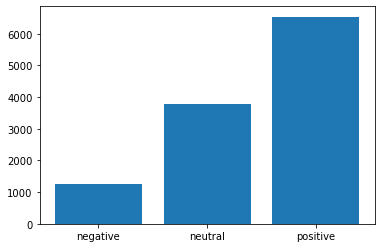

In [36]:
#a bar graph by sentiment

labels = df3.groupby('sentiment_polarity').count().index.values
values = df3.groupby('sentiment_polarity').size().values
plt.bar(labels, values)

### Sentiment across months

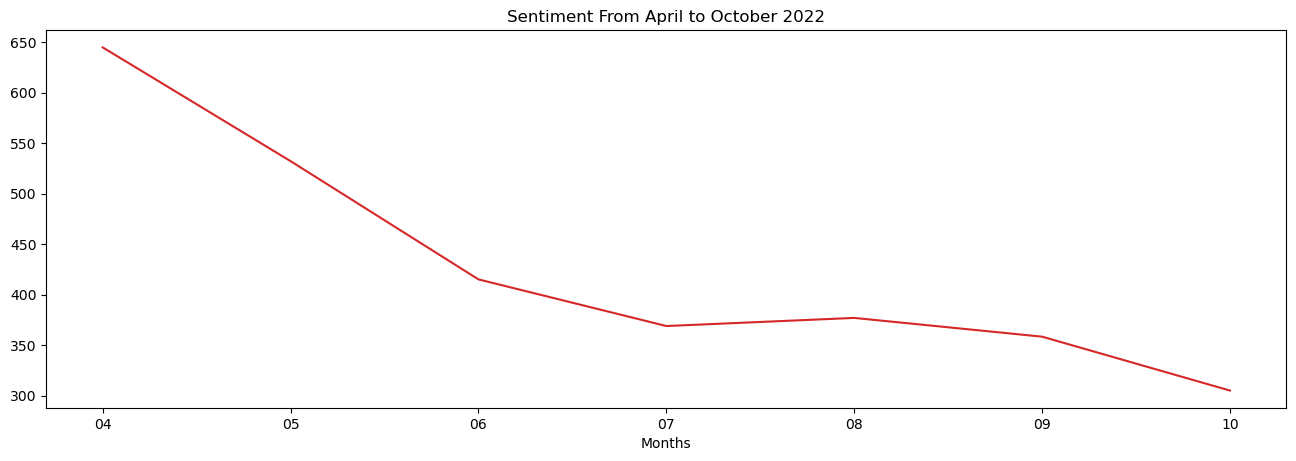

In [37]:
df3_all = df3.groupby(['months']).sum()

def plot_df(df3, x, y, title="", xlabel='Months', ylabel='', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.savefig('graph1.png')
    plt.show()

plot_df(df3_all, x=df3_all.index, y=df3_all.sentiment, title='Sentiment From April to October 2022')

### Sentiment Comparison

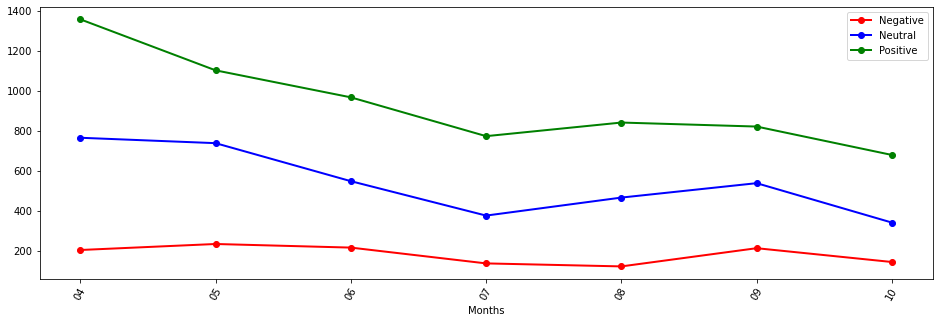

In [38]:
#Create a plot that contains three lines for sentiment polarity

df3_all2 = df3.groupby(['months','sentiment_polarity']).sentiment_polarity.count().unstack()
fig, ax = plt.subplots(figsize=[16, 5])

ax.plot(df3_all2.index,
        df3_all2['negative'],color='red',
         marker='o', linewidth=2, label='Negative')
ax.plot(df3_all2.index,
        df3_all2['neutral'],color='blue',
         marker='o', linewidth=2,
         label='Neutral')
ax.plot(df3_all2.index,
        df3_all2['positive'],color='green',
        marker='o', linewidth=2,
        label='Positive')
plt.xticks(rotation=60)
ax.set_xlabel('Months')
ax.set_ylabel('')
plt.legend()
plt.show()

### Word Frequency

In [39]:
#Check on the word frequency
from collections import Counter

word_count = Counter(" ".join(df3.clean_text).split()).most_common(20)
word_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])
print(word_frequency)

         Word  Frequency
0      office       3754
1        work       3587
2      return       1938
3        back       1656
4   workplace        847
5         get        808
6           u        806
7      hybrid        786
8         new        773
9    business        699
10       time        674
11        via        625
12     remote        623
13        day        622
14       help        612
15       make        530
16       like        528
17      covid        506
18     people        496
19       team        461


Text(0.5, 1.0, 'Word Frequency')

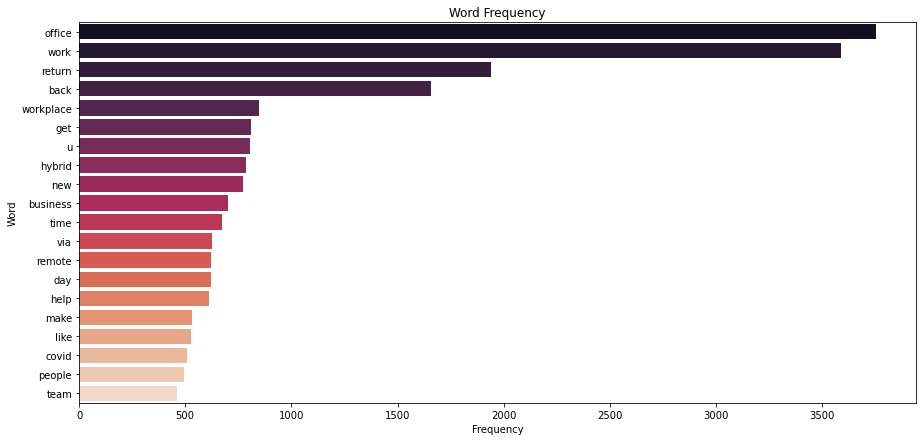

In [40]:
f, ax = plt.subplots(figsize = (15,7))
sns.barplot(x = 'Frequency', y = 'Word', data = word_frequency, palette = 'rocket')
plt.title('Word Frequency')

# Chapter 4: Data Modeling

## Number of Features

Need to change this clean data into numeric features. ML algorithms can learn only takes numeric. Only transform the training set of input variable. The test should not be disturb.

In [41]:
#drop irrelevant columns
df4 = df3.copy()
df4.drop(['text','months','author_location','date','sentiment'], axis='columns', inplace=True)

In [56]:
df4

,clean_text,sentiment_polarity
0,future work great realignment business leaders...,positive
1,learn importance agency collaboration hybrid w...,positive
2,place,neutral
3,coach cover group coach coul,neutral
4,hybrid work problem remote trust,positive
...,...,...
11577,company one office check article government u ...,positive
11578,search work pant feel like acceptable bring bl...,positive
11579,myth drive idea chance build drive innovation ...,positive
11580,feel anxious work way cope w,negative


In [58]:
df4.to_csv('clean_data.csv', index=False)

## TF-IDF: Check on the number of features

### Naives Bayes

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

def grid_search(ml_algo):
    tfidf = TfidfVectorizer()
  
    param_grid = {'tfidf__ngram_range':[(1,1),(1,2)],
                 'tfidf__max_features':[1000,2000,3000]}
        
    pipe = Pipeline(steps=[("tfidf", tfidf), ("naives", ml_algo)])
    
    search = GridSearchCV(pipe, param_grid, cv=10, scoring="balanced_accuracy", n_jobs=-1)
    return search

In [47]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

naives = MultinomialNB()
model_grid_search = grid_search(naives)

model_grid_search.fit(df4.clean_text,df4.sentiment_polarity)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('naives', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'tfidf__max_features': [1000, 2000, 3000],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring='balanced_accuracy')

In [48]:
print(model_grid_search.best_estimator_)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=2000, ngram_range=(1, 2))),
                ('naives', MultinomialNB())])


### SVC

In [49]:
def grid_search(ml_algo):
    tfidf = TfidfVectorizer()
  
    param_grid = {'tfidf__ngram_range':[(1,1),(1,2)],
                 'tfidf__max_features':[2000,11000,None]}
        
    pipe = Pipeline(steps=[("tfidf", tfidf), ("svm", ml_algo)])
    
    search = GridSearchCV(pipe, param_grid, cv=10, scoring="balanced_accuracy", n_jobs=-1)
    return search

In [50]:
from sklearn.svm import LinearSVC

svc = LinearSVC(random_state=1337,max_iter=10000)
model_grid_search = grid_search(svc)

model_grid_search.fit(df4.clean_text,df4.sentiment_polarity)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('svm',
                                        LinearSVC(max_iter=10000,
                                                  random_state=1337))]),
             n_jobs=-1,
             param_grid={'tfidf__max_features': [2000, 11000, None],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring='balanced_accuracy')

In [51]:
print(model_grid_search.best_estimator_)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=11000)),
                ('svm', LinearSVC(max_iter=10000, random_state=1337))])


### RF

In [52]:
def grid_search(ml_algo):
    tfidf = TfidfVectorizer()
  
    param_grid = {'tfidf__ngram_range':[(1,1),(1,2)],
                 'tfidf__max_features':[1000,2000,4000]}
        
    pipe = Pipeline(steps=[("tfidf", tfidf), ("randomf", ml_algo)])
    
    search = GridSearchCV(pipe, param_grid, cv=10, scoring="balanced_accuracy", n_jobs=-1)
    return search

In [54]:
from sklearn.ensemble import RandomForestClassifier

randomf = RandomForestClassifier()
model_grid_search = grid_search(randomf)

model_grid_search.fit(df4.clean_text,df4.sentiment_polarity)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('randomf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'tfidf__max_features': [1000, 2000, 4000],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring='balanced_accuracy')

In [55]:
print(model_grid_search.best_estimator_)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=1000)),
                ('randomf', RandomForestClassifier())])


### AdaBoost

In [ ]:
def grid_search(ml_algo):
    tfidf = TfidfVectorizer()
  
    param_grid = {'tfidf__ngram_range':[(1,1),(1,2)],
                 'tfidf__max_features':[2000,11000,None]}
        
    pipe = Pipeline(steps=[("tfidf", tfidf), ("adaboost", ml_algo)])
    
    search = GridSearchCV(pipe, param_grid, cv=10, scoring="balanced_accuracy", n_jobs=-1)
    return search

In [ ]:
from sklearn.ensemble import AdaBoostClassifier 
adabst = AdaBoostClassifier()

model_grid_search = grid_search(adabst)

model_grid_search.fit(df4.clean_text,df4.sentiment_polarity)

In [ ]:
print(model_grid_search.best_estimator_)

In [173]:

#Feature Extraction with tf-idf for each ML
tf_idf_naives = TfidfVectorizer(stop_words=None, max_features=2000, ngram_range=(1, 2))
tf_idf_svc = TfidfVectorizer(stop_words=None, max_features=11000, ngram_range=(1, 2))
tf_idf_rf = TfidfVectorizer(stop_words=None, max_features=2000, ngram_range=(1, 2))
tf_idf_ada = TfidfVectorizer(stop_words=None, max_features=11000, ngram_range=(1, 2))


## SVC with Imbalanced data

The training and test is randomly split within k-fold cross validation

In [174]:
from sklearn.svm import LinearSVC

support_vect_mach = LinearSVC(random_state=1337,max_iter=10000)

The data go through the created pipeline, following the steps:
1. Spliting the data
2. Transform the words into vectors
3. Train the model 
4. Predict the model by testing on the test data
5. Evaluate the model by accuracy, precision, recall, f1

In [175]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score

def cross_valid(splits, X, Y, pipeline, average_method):
    
    kfold = StratifiedKFold(n_splits=splits, shuffle=True, random_state=777)
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for train_idx, test_idx in kfold.split(X, Y):
        support_vect_mach_fit = pipeline.fit(X[train_idx], Y[train_idx]) #run fit_transform to the training set
        prediction = support_vect_mach_fit.predict(X[test_idx]) #run on transform to the testing set, preventing leakage
        scores = support_vect_mach_fit.score(X[test_idx],Y[test_idx]) #check on the accuracy score on test data
        
        accuracy.append(scores * 100)
        precision.append(precision_score(Y[test_idx], prediction, average=average_method)*100)
        print('              negative    neutral     positive')
        print('precision:',precision_score(Y[test_idx], prediction, average=None))
        recall.append(recall_score(Y[test_idx], prediction, average=average_method)*100)
        print('recall:   ',recall_score(Y[test_idx], prediction, average=None))
        f1.append(f1_score(Y[test_idx], prediction, average=average_method)*100)
        print('f1 score: ',f1_score(Y[test_idx], prediction, average=None))
        print('-'*50)

    print("accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(accuracy), np.std(accuracy)))
    print("precision: %.2f%% (+/- %.2f%%)" % (np.mean(precision), np.std(precision)))
    print("recall: %.2f%% (+/- %.2f%%)" % (np.mean(recall), np.std(recall)))
    print("f1 score: %.2f%% (+/- %.2f%%)" % (np.mean(f1), np.std(f1)))

In [176]:
from sklearn.pipeline import Pipeline

ori_pipeline = Pipeline([
    ('vectorizer', tf_idf_svc),
    ('classifier', support_vect_mach)
])

In [216]:
SVC_Ori = cross_valid(10, X[train_idx], Y[train_idx], ori_pipeline, 'macro')

              negative    neutral     positive
precision: [0.91588785 0.91623037 0.93880597]
recall:    [0.77165354 0.92592593 0.9617737 ]
f1 score:  [0.83760684 0.92105263 0.95015106]
--------------------------------------------------
              negative    neutral     positive
precision: [0.89622642 0.88520408 0.93040847]
recall:    [0.7480315  0.91798942 0.94036697]
f1 score:  [0.81545064 0.9012987  0.93536122]
--------------------------------------------------
              negative    neutral     positive
precision: [0.9009901  0.90231362 0.93712575]
recall:    [0.71653543 0.93103448 0.95718654]
f1 score:  [0.79824561 0.91644909 0.94704992]
--------------------------------------------------
              negative    neutral     positive
precision: [0.95505618 0.88295165 0.92307692]
recall:    [0.66929134 0.9204244  0.95412844]
f1 score:  [0.78703704 0.9012987  0.93834586]
--------------------------------------------------
              negative    neutral     positive
precision

## SMOTE + SVC

In [178]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

SMOTE_pipe = make_pipeline(tf_idf_svc, SMOTE(random_state = 777), support_vect_mach)


In [217]:
SVC_SMOTE = cross_valid(10, df4.clean_text, df4.sentiment_polarity, SMOTE_pipe, 'macro')

              negative    neutral     positive
precision: [0.832      0.92819149 0.95136778]
recall:    [0.81889764 0.92328042 0.95718654]
f1 score:  [0.82539683 0.92572944 0.95426829]
--------------------------------------------------
              negative    neutral     positive
precision: [0.79365079 0.88461538 0.94401244]
recall:    [0.78740157 0.91269841 0.92813456]
f1 score:  [0.79051383 0.8984375  0.93600617]
--------------------------------------------------
              negative    neutral     positive
precision: [0.776      0.91052632 0.94793262]
recall:    [0.76377953 0.91777188 0.94648318]
f1 score:  [0.76984127 0.91413474 0.94720735]
--------------------------------------------------
              negative    neutral     positive
precision: [0.87272727 0.8984375  0.93524096]
recall:    [0.75590551 0.91511936 0.94954128]
f1 score:  [0.81012658 0.90670171 0.94233687]
--------------------------------------------------
              negative    neutral     positive
precision

## RandomOverSampling + SVC

In [180]:
from imblearn.over_sampling import RandomOverSampler

RandomOverSam_pipe = make_pipeline(tf_idf_svc, RandomOverSampler(random_state = 777), support_vect_mach)

In [218]:
SVC_ROS = cross_valid(10, df4.clean_text, df4.sentiment_polarity, RandomOverSam_pipe, 'macro')

              negative    neutral     positive
precision: [0.82170543 0.91968912 0.96118012]
recall:    [0.83464567 0.93915344 0.94648318]
f1 score:  [0.828125   0.92931937 0.95377504]
--------------------------------------------------
              negative    neutral     positive
precision: [0.8        0.87344913 0.95879556]
recall:    [0.78740157 0.93121693 0.92507645]
f1 score:  [0.79365079 0.90140845 0.94163424]
--------------------------------------------------
              negative    neutral     positive
precision: [0.77952756 0.90956072 0.95341615]
recall:    [0.77952756 0.933687   0.93883792]
f1 score:  [0.77952756 0.92146597 0.94607088]
--------------------------------------------------
              negative    neutral     positive
precision: [0.85964912 0.89002558 0.94333844]
recall:    [0.77165354 0.92307692 0.94189602]
f1 score:  [0.81327801 0.90625    0.94261668]
--------------------------------------------------
              negative    neutral     positive
precision

## RandomUnderSampling + SVC

In [182]:
from imblearn.under_sampling import RandomUnderSampler

RandomUnderSam_pipe = make_pipeline(tf_idf_svc, RandomUnderSampler(random_state = 777), support_vect_mach)

In [219]:
SVC_RUS = cross_valid(10, df4.clean_text, df4.sentiment_polarity, RandomUnderSam_pipe, 'macro')

              negative    neutral     positive
precision: [0.61621622 0.79761905 0.95487365]
recall:    [0.8976378  0.88624339 0.8088685 ]
f1 score:  [0.73076923 0.839599   0.87582781]
--------------------------------------------------
              negative    neutral     positive
precision: [0.61271676 0.77884615 0.93859649]
recall:    [0.83464567 0.85714286 0.81804281]
f1 score:  [0.70666667 0.81612091 0.87418301]
--------------------------------------------------
              negative    neutral     positive
precision: [0.58757062 0.78239609 0.94055944]
recall:    [0.81889764 0.84880637 0.82262997]
f1 score:  [0.68421053 0.81424936 0.8776509 ]
--------------------------------------------------
              negative    neutral     positive
precision: [0.6402439  0.78883495 0.92439863]
recall:    [0.82677165 0.86206897 0.82262997]
f1 score:  [0.72164948 0.82382763 0.87055016]
--------------------------------------------------
              negative    neutral     positive
precision

## Multinominal Naives Bayes with Imbalanced Data

In [184]:
from sklearn.naive_bayes import MultinomialNB

MultiNB = MultinomialNB()

In [185]:
multiNB_pipeline = Pipeline([
    ('vectorizer', tf_idf_naives),
    ('classifier', MultiNB)
])

In [220]:
NB_Ori = cross_valid(10, df4.clean_text, df4.sentiment_polarity, multiNB_pipeline, 'macro')

              negative    neutral     positive
precision: [0.92307692 0.84476534 0.75542169]
recall:    [0.37795276 0.61904762 0.9587156 ]
f1 score:  [0.53631285 0.71450382 0.84501348]
--------------------------------------------------
              negative    neutral     positive
precision: [1.         0.82283465 0.72537659]
recall:    [0.33070866 0.55291005 0.95718654]
f1 score:  [0.49704142 0.66139241 0.82531312]
--------------------------------------------------
              negative    neutral     positive
precision: [0.97368421 0.8401487  0.74383079]
recall:    [0.29133858 0.5994695  0.96788991]
f1 score:  [0.44848485 0.6996904  0.84119601]
--------------------------------------------------
              negative    neutral     positive
precision: [0.89189189 0.7761194  0.72567409]
recall:    [0.25984252 0.55172414 0.94648318]
f1 score:  [0.40243902 0.64496124 0.82149967]
--------------------------------------------------
              negative    neutral     positive
precision

## SMOTE + NB

In [187]:
SMOTE_MultiNB_pipe = make_pipeline(tf_idf_naives, SMOTE(random_state = 777), MultiNB)

In [221]:
NB_SMOTE = cross_valid(10, df4.clean_text, df4.sentiment_polarity, SMOTE_MultiNB_pipe, 'macro')

              negative    neutral     positive
precision: [0.44444444 0.85714286 0.90468498]
recall:    [0.78740157 0.71428571 0.85626911]
f1 score:  [0.56818182 0.77922078 0.87981147]
--------------------------------------------------
              negative    neutral     positive
precision: [0.40816327 0.83161512 0.89566613]
recall:    [0.78740157 0.64021164 0.85321101]
f1 score:  [0.53763441 0.72346786 0.87392326]
--------------------------------------------------
              negative    neutral     positive
precision: [0.40740741 0.81818182 0.9117175 ]
recall:    [0.69291339 0.69230769 0.86850153]
f1 score:  [0.51311953 0.75       0.88958496]
--------------------------------------------------
              negative    neutral     positive
precision: [0.39269406 0.78056426 0.88548387]
recall:    [0.67716535 0.66047745 0.83944954]
f1 score:  [0.49710983 0.71551724 0.86185243]
--------------------------------------------------
              negative    neutral     positive
precision

## RandomOverSampler + NB

In [189]:
RandomOverSam_MultiNB_pipe = make_pipeline(tf_idf_naives, RandomOverSampler(random_state = 777), MultiNB)

In [222]:
NB_ROS = cross_valid(10, df4.clean_text, df4.sentiment_polarity, RandomOverSam_MultiNB_pipe, 'macro')

              negative    neutral     positive
precision: [0.39837398 0.8447205  0.92047377]
recall:    [0.77165354 0.71957672 0.83180428]
f1 score:  [0.52546917 0.77714286 0.87389558]
--------------------------------------------------
              negative    neutral     positive
precision: [0.38846154 0.83050847 0.91390728]
recall:    [0.79527559 0.64814815 0.8440367 ]
f1 score:  [0.52196382 0.72808321 0.87758347]
--------------------------------------------------
              negative    neutral     positive
precision: [0.4122807  0.81515152 0.92333333]
recall:    [0.74015748 0.71352785 0.8470948 ]
f1 score:  [0.52957746 0.76096181 0.88357257]
--------------------------------------------------
              negative    neutral     positive
precision: [0.36170213 0.79076923 0.90468227]
recall:    [0.66929134 0.68169761 0.82721713]
f1 score:  [0.46961326 0.73219373 0.86421725]
--------------------------------------------------
              negative    neutral     positive
precision

## RandomUnderSampling + NB

In [191]:
RandomUnderSam_MultiNB_pipe = make_pipeline(tf_idf_naives, RandomUnderSampler(random_state = 777), MultiNB)

In [223]:
NB_RUS = cross_valid(10, df4.clean_text, df4.sentiment_polarity, RandomUnderSam_MultiNB_pipe, 'macro')

              negative    neutral     positive
precision: [0.34915254 0.77917981 0.89579525]
recall:    [0.81102362 0.65343915 0.74923547]
f1 score:  [0.48815166 0.71079137 0.81598668]
--------------------------------------------------
              negative    neutral     positive
precision: [0.34827586 0.73817035 0.9057971 ]
recall:    [0.79527559 0.61904762 0.76452599]
f1 score:  [0.48441247 0.67338129 0.8291874 ]
--------------------------------------------------
              negative    neutral     positive
precision: [0.35640138 0.76582278 0.920434  ]
recall:    [0.81102362 0.64190981 0.77828746]
f1 score:  [0.49519231 0.6984127  0.84341342]
--------------------------------------------------
              negative    neutral     positive
precision: [0.32179931 0.74522293 0.89369369]
recall:    [0.73228346 0.62068966 0.75840979]
f1 score:  [0.44711538 0.67727931 0.82051282]
--------------------------------------------------
              negative    neutral     positive
precision

## Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [193]:
rf_pipeline = Pipeline([
    ('vectorizer', tf_idf_rf),
    ('classifier', rf)
])

In [224]:
RF_Ori = cross_valid(10, df4.clean_text, df4.sentiment_polarity, rf_pipeline, 'macro')

              negative    neutral     positive
precision: [0.92473118 0.8902439  0.94054878]
recall:    [0.67716535 0.96560847 0.94342508]
f1 score:  [0.78181818 0.92639594 0.94198473]
--------------------------------------------------
              negative    neutral     positive
precision: [0.97435897 0.8507109  0.92261002]
recall:    [0.5984252  0.94973545 0.92966361]
f1 score:  [0.74146341 0.8975     0.92612338]
--------------------------------------------------
              negative    neutral     positive
precision: [0.95       0.85952381 0.93617021]
recall:    [0.5984252  0.95755968 0.94189602]
f1 score:  [0.73429952 0.90589711 0.93902439]
--------------------------------------------------
              negative    neutral     positive
precision: [0.94117647 0.8534279  0.94      ]
recall:    [0.62992126 0.95755968 0.93425076]
f1 score:  [0.75471698 0.9025     0.93711656]
--------------------------------------------------
              negative    neutral     positive
precision

## RF + SMOTE

In [195]:
SMOTE_rf_pipe = make_pipeline(tf_idf_rf, SMOTE(random_state = 777), rf)

In [225]:
RF_SMOTE = cross_valid(10, df4.clean_text, df4.sentiment_polarity, SMOTE_rf_pipe, 'macro')

              negative    neutral     positive
precision: [0.832      0.87317073 0.96314103]
recall:    [0.81889764 0.94708995 0.91896024]
f1 score:  [0.82539683 0.90862944 0.94053208]
--------------------------------------------------
              negative    neutral     positive
precision: [0.84313725 0.80536913 0.94098361]
recall:    [0.67716535 0.95238095 0.87767584]
f1 score:  [0.7510917  0.87272727 0.90822785]
--------------------------------------------------
              negative    neutral     positive
precision: [0.79508197 0.85371703 0.95799677]
recall:    [0.76377953 0.94429708 0.90672783]
f1 score:  [0.77911647 0.89672544 0.9316575 ]
--------------------------------------------------
              negative    neutral     positive
precision: [0.83478261 0.83916084 0.95928339]
recall:    [0.75590551 0.95490716 0.90061162]
f1 score:  [0.79338843 0.89330025 0.92902208]
--------------------------------------------------
              negative    neutral     positive
precision

## RF + Random OverSampling

In [203]:
RandomOverSam_rf_pipe = make_pipeline(tf_idf_rf, RandomOverSampler(random_state = 777), rf)

In [226]:
RF_ROS = cross_valid(10, df4.clean_text, df4.sentiment_polarity, RandomOverSam_rf_pipe, 'macro')

              negative    neutral     positive
precision: [0.87179487 0.88619855 0.96979332]
recall:    [0.80314961 0.96825397 0.93272171]
f1 score:  [0.83606557 0.92541087 0.95089634]
--------------------------------------------------
              negative    neutral     positive
precision: [0.94680851 0.84331797 0.95087163]
recall:    [0.7007874  0.96825397 0.91743119]
f1 score:  [0.80542986 0.90147783 0.93385214]
--------------------------------------------------
              negative    neutral     positive
precision: [0.87378641 0.85647059 0.96190476]
recall:    [0.70866142 0.96551724 0.9266055 ]
f1 score:  [0.7826087  0.90773067 0.94392523]
--------------------------------------------------
              negative    neutral     positive
precision: [0.82857143 0.84160757 0.94920635]
recall:    [0.68503937 0.94429708 0.91437309]
f1 score:  [0.75       0.89       0.93146417]
--------------------------------------------------
              negative    neutral     positive
precision

## RF + Random UnderSampling

In [209]:
RandomUnderSam_rf_pipe = make_pipeline(tf_idf_rf, RandomUnderSampler(random_state = 777), rf)

In [210]:
cross_valid(10, df4.clean_text, df4.sentiment_polarity, RandomUnderSam_rf_pipe, 'macro')

              negative    neutral     positive
precision: [0.6626506  0.78384279 0.97943925]
recall:    [0.86614173 0.94973545 0.80122324]
f1 score:  [0.75085324 0.85885167 0.88141295]
--------------------------------------------------
              negative    neutral     positive
precision: [0.68382353 0.74315789 0.94708029]
recall:    [0.73228346 0.93386243 0.79357798]
f1 score:  [0.70722433 0.82766706 0.86356073]
--------------------------------------------------
              negative    neutral     positive
precision: [0.61392405 0.74946467 0.97373358]
recall:    [0.76377953 0.92838196 0.79357798]
f1 score:  [0.68070175 0.82938389 0.87447346]
--------------------------------------------------
              negative    neutral     positive
precision: [0.62987013 0.74364407 0.96992481]
recall:    [0.76377953 0.93103448 0.78899083]
f1 score:  [0.69039146 0.82685512 0.87015177]
--------------------------------------------------
              negative    neutral     positive
precision

## AdaBoost

In [298]:

ada = AdaBoostClassifier()


In [299]:
ada_pipeline = Pipeline([
    ('vectorizer', tf_idf_ada),
    ('classifier', ada)
])

In [301]:
cross_valid(10, df4.clean_text, df4.sentiment_polarity, ada_pipeline, 'macro')

              negative    neutral     positive
precision: [0.76271186 0.59459459 0.97452229]
recall:    [0.35433071 0.98941799 0.70183486]
f1 score:  [0.48387097 0.7428004  0.816     ]
--------------------------------------------------
              negative    neutral     positive
precision: [0.81034483 0.59493671 0.95948827]
recall:    [0.37007874 0.99470899 0.68807339]
f1 score:  [0.50810811 0.74455446 0.80142476]
--------------------------------------------------
              negative    neutral     positive
precision: [0.74626866 0.60517799 0.96194503]
recall:    [0.39370079 0.99204244 0.69571865]
f1 score:  [0.51546392 0.75175879 0.80745342]
--------------------------------------------------
              negative    neutral     positive
precision: [0.8        0.5625     0.94854586]
recall:    [0.34645669 0.97877984 0.64831804]
f1 score:  [0.48351648 0.71442401 0.7702089 ]
--------------------------------------------------
              negative    neutral     positive
precision

## AdaBoost with SMOTE

In [207]:
SMOTE_ada_pipe = make_pipeline(tf_idf_ada, SMOTE(random_state = 777), ada)

In [208]:
cross_valid(10, df4.clean_text, df4.sentiment_polarity, SMOTE_ada_pipe, 'macro')

              negative    neutral     positive
precision: [0.6952381  0.53924419 0.97814208]
recall:    [0.57480315 0.98148148 0.54740061]
f1 score:  [0.62931034 0.69606004 0.70196078]
--------------------------------------------------
              negative    neutral     positive
precision: [0.68421053 0.53724928 0.96994536]
recall:    [0.51181102 0.99206349 0.54281346]
f1 score:  [0.58558559 0.69702602 0.69607843]
--------------------------------------------------
              negative    neutral     positive
precision: [0.68421053 0.55177515 0.96899225]
recall:    [0.51181102 0.98938992 0.5733945 ]
f1 score:  [0.58558559 0.70845204 0.7204611 ]
--------------------------------------------------
              negative    neutral     positive
precision: [0.6122449  0.52104499 0.94339623]
recall:    [0.47244094 0.95225464 0.5351682 ]
f1 score:  [0.53333333 0.67354597 0.68292683]
--------------------------------------------------
              negative    neutral     positive
precision

## AdaBoost + Random OverSampling

In [212]:
RandomOverSam_ada_pipe = make_pipeline(tf_idf_ada, RandomOverSampler(random_state = 777), ada)

In [213]:
AdaBoost_ROS = cross_valid(10, df4.clean_text, df4.sentiment_polarity, RandomOverSam_ada_pipe, 'macro')

              negative    neutral     positive
precision: [0.66666667 0.58740157 0.9751693 ]
recall:    [0.42519685 0.98677249 0.66055046]
f1 score:  [0.51923077 0.73642646 0.78760255]
--------------------------------------------------
              negative    neutral     positive
precision: [0.69230769 0.59305994 0.97315436]
recall:    [0.42519685 0.99470899 0.66513761]
f1 score:  [0.52682927 0.743083   0.79019074]
--------------------------------------------------
              negative    neutral     positive
precision: [0.6875     0.59744409 0.96902655]
recall:    [0.43307087 0.99204244 0.66972477]
f1 score:  [0.53140097 0.74576271 0.7920434 ]
--------------------------------------------------
              negative    neutral     positive
precision: [0.72307692 0.55789474 0.95560748]
recall:    [0.37007874 0.98408488 0.62538226]
f1 score:  [0.48958333 0.71209213 0.75600739]
--------------------------------------------------
              negative    neutral     positive
precision

Do dataframe: https://www.machinelearningplus.com/pandas/how-to-create-pandas-dataframe-python/

### AdaBoost + Random UnderSampling

In [214]:
RandomUnderSam_ada_pipe = make_pipeline(tf_idf_ada, RandomUnderSampler(random_state = 777), ada)

In [215]:
AdaBoost_RUS = cross_valid(10, df4.clean_text, df4.sentiment_polarity, RandomUnderSam_ada_pipe, 'macro')

              negative    neutral     positive
precision: [0.50925926 0.5585997  0.97208122]
recall:    [0.43307087 0.97089947 0.58562691]
f1 score:  [0.46808511 0.70917874 0.73091603]
--------------------------------------------------
              negative    neutral     positive
precision: [0.48809524 0.57407407 0.97423888]
recall:    [0.32283465 0.98412698 0.63608563]
f1 score:  [0.38862559 0.7251462  0.76965772]
--------------------------------------------------
              negative    neutral     positive
precision: [0.63095238 0.59775641 0.96666667]
recall:    [0.41732283 0.98938992 0.66513761]
f1 score:  [0.50236967 0.74525475 0.78804348]
--------------------------------------------------
              negative    neutral     positive
precision: [0.63013699 0.55740181 0.94562648]
recall:    [0.36220472 0.97877984 0.6116208 ]
f1 score:  [0.46       0.71029836 0.74280409]
--------------------------------------------------
              negative    neutral     positive
precision

## Performance Comparison

In [238]:

model_compare = {'Model': ['SVC', 'SVC+SMOTE', 'SVC+ROS', 'SVC+RUS', 
                           'NB','NB+SMOTE','NB+ROS','NB+RUS',
                          'RF','RF+SMOTE','RF+ROS','RF+RUS',
                          'AdaB','AdaB+SMOTE','AdaB+ROS','AdaB+RUS'],
                 'Accuracy(%)': [91.13,91.93,92.11,83.41,76.37,78.48,78.06,72.10,90.93,90.42,91.52,83.42,76.09,69.50,75.36,73.62],
                 'Precision(%)': [91.60,88.92,89.16,77.79,83.32,71.47,71.19,67.06,91.23,87.63,89.92,77.92,78.94,72.05,76.72,72.72],
                 'Recall(%)': [87.21,88.66,88.96,84.27,61.99,76.27,76.42,73.30,84.10,87.14,87.30,83.54,69.38,68.97,69.80,68.25],
                 'F1-score(%)':[89.04,88.77,89.03,80.11,66.45,71.88,71.53,66.47,86.55,87.20,88.24,79.91,69.46,66.48,69.35,66.90]}

df_compare = pd.DataFrame(data=model_compare).set_index('Model')

df_compare



,Accuracy(%),Precision(%),Recall(%),F1-score(%)
Model,,,,
SVC,91.13,91.60,87.21,89.04
SVC+SMOTE,91.93,88.92,88.66,88.77
SVC+ROS,92.11,89.16,88.96,89.03
SVC+RUS,83.41,77.79,84.27,80.11
NB,76.37,83.32,61.99,66.45
NB+SMOTE,78.48,71.47,76.27,71.88
NB+ROS,78.06,71.19,76.42,71.53
NB+RUS,72.10,67.06,73.30,66.47
RF,90.93,91.23,84.10,86.55
